<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/assignment-1/(2_4)spectral_relaxation_of_K_means_using_Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Question**
> *Instead of using the method suggested by spectral clustering to map eigenvectors to cluster assignments, use the following method: Assign data point i to cluster l whenever
l=arg max vij j =1,...,k
where vj ∈ Rn is the eigenvector of the Kernel matrix associated with the j-th largest eigenvalue. How does this mapping perform for this dataset?. Explain your insights.*



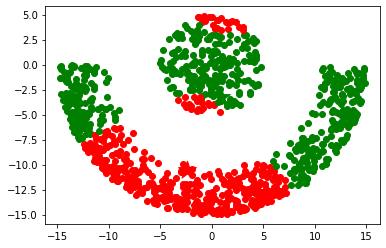

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def find_kernal_matrix(array):
    transposearray=np.transpose(array)
    k=np.matmul(array, transposearray)
    for i in range(1000):
        for j in range(1000):
            k[i][j]+=1
    for i in range(1000):
        for j in range(1000):
            k[i][j]=k[i][j]*k[i][j]
    I=np.identity(1000)
    div=1/1000
    divmat=np.full((1000,1000), div)
    matminus = np.subtract(I, divmat) 
    f=np.matmul(matminus, k)
    kernalcent=np.matmul(f, matminus)
    return kernalcent



def find_H_matrix(kernalcent,k):
    eig_vals, eig_vecs = np.linalg.eig(kernalcent)
    eig_index=eig_vals.argsort()[-k:][::-1]
    top_k_eigen=[]
    for i in range(k):
        top_k_eigen.append(eig_vals[eig_index[i]])
    top_k_eigen_vec=[]
    for i in range(k):
        top_k_eigen_vec.append(eig_vecs[:,eig_index[i]])

    top_k_eigen_vec = np.array(top_k_eigen_vec)
    top_k_eigen_vec=np.transpose(top_k_eigen_vec)
    array=top_k_eigen_vec
    return array




def assignment_to_cluster(array,k):
    assign=np.zeros([1000])
    for i in range(1000):
        index=0
        maximum=array[i][0]
        for j in range(1,k):
            if(array[i][j]>maximum):
                index=j
                maximum=array[i][j]
        assign[i]=index
    return assign
  


def find_mean_of_cluster(arrayplot,assign):
    mean=np.zeros([k,2])
    count=np.zeros([k])
    for i in range(1000):
        mean[int(assign[i])]= np.add(mean[int(assign[i])],arrayplot[i])
        count[int(assign[i])]+=1
    for i in range(len(mean)):
        mean[i]=np.divide(mean[i], count[i])
    return mean


def plot(arrayplot,assign,mean):
    colour=['red','green','blue','orange','yellow']
    for i in range(1000):
        plt.scatter(arrayplot[i][0], arrayplot[i][1], c = colour[int(assign[i])])
    for i in range(k):
        plt.scatter(mean[i][0], mean[i][1],c = colour[i],marker='*',s=350)  
    plt.show()


df=pd.read_csv(r"/content/cm_dataset_2.csv",header=None)
df.columns=('x','y')


array=df.to_numpy()
arrayplot=array
plotarray=array

number_of_clusters=2
k=number_of_clusters


kernalcent=find_kernal_matrix(array)
array=find_H_matrix(kernalcent,k)
assign=assignment_to_cluster(array,k)
mean=find_mean_of_cluster(arrayplot,assign)
plot(arrayplot,assign,mean)
